# Data Management and Analysis (in R)

**M.Geo.336e: Digital Geoscience Seminar***

Anil Yildiz, Dr. sc.

E-mail: [yildiz@mbd.rwth-aachen.de](mailto:yildiz@mbd.rwth-aachen.de)
Personal homepage: [www.anilyildiz.info](https://www.anilyildiz.info)

\* *This Jupyter notebook was initially used in the Digital Geoscience Seminar at the University of Göttingen.*

## Introduction

[Download R](https://cran.r-project.org/)

[Download R Studio](https://www.rstudio.com/products/rstudio/download/#download)

## Basics

### Data structures

 <img src="https://ndownloader.figshare.com/files/27853281?private_link=56d4dd6c725ef9fcb979" alt="Data formats in R" width="600" height="440"> 

A *variable* contains one element. You can use the assign operator "<-" or equal sign "=" to assign an element to a variable.

In [58]:
var1 <- 1
var2 = "a"
var3 <- T
var1
var2
var3

[1] 1

[1] "a"

[1] TRUE

A *vector* contains multiple elements in a single dimension. 

In [59]:
vec1 <- c(var1,var2,var3)
vec1
vec2 <- c(1,2,3)
vec2

[1] "1"    "a"    "TRUE"

[1] 1 2 3

A *matrix* is a 2-dimensional data structure that contains multiple elements of a single type.

In [60]:
mat1 <- matrix(seq(1,9,1),nrow=3,ncol=3,byrow=T)
mat1
mat2 <- matrix(letters[seq(1,9,1)],nrow=3,ncol=3,byrow=T)
mat2

1,2,3
4,5,6
7,8,9


a,b,c
d,e,f
g,h,i


A *data frame* is a 2-dimensional data structure that can contain multiple elements of various types.

In [61]:
df1 <- data.frame(col1=c(1,4,7),col2=c("a","b","c"),col3=c(T,T,F))
df1
class(df1[,1])
class(df1[,2])
class(df1[,3])

col1,col2,col3
1,a,TRUE
4,b,TRUE
7,c,FALSE


[1] "numeric"

[1] "factor"

[1] "logical"

A *list* is a multi-dimensional data structure that can contain multiple structures of various types.

In [62]:
list1 <- list(l1=var1,l2=vec1,l3=mat1,l4=df1)
list1

1,2,3
4,5,6
7,8,9
col1,col2,col3
1,a,TRUE
4,b,TRUE
7,c,FALSE


## Importing data

We will access raw data of air temperature (in °C) from Newcastle upon Tyne, UK over the API of [National Green Infrastructure Facility](https://www.twitter.com/ngif_uk). Let's have a look at a generic download link:

https://api.ngif.urbanobservatory.ac.uk/api/v2/sensors/timeseries/54780465-b11a-4d6c-8465-d82db47d69df/historic?startTime=2021-12-01T00:00:00.000Z&endTime=2021-12-17T00:00:00.000Z&outputAs=csv

Wee see that the first part of the link with a unique identifer (54780465-b11a-4d6c-8465-d82db47d69df) provides data from one sensor (air temperature):

https://api.ngif.urbanobservatory.ac.uk/api/v2/sensors/timeseries/54780465-b11a-4d6c-8465-d82db47d69df/

We have then the starting time and end time in the following format: 

2021-12-01T00:00:00.000Z

2021-12-17T00:00:00.000Z

We see that we can reconstruct the download link for this particular sensor in any time frame. We will write a code snippet that will provide us the air temperature at Newcastle upon Tyne up to 1 week before the execution of the code. We write a function to construct a download link using a start time and end time.

In [92]:
construct_link <- function(start,end) {
    link_part1 <- "https://api.ngif.urbanobservatory.ac.uk/api/v2/sensors/timeseries/"
    link_part2 <- "54780465-b11a-4d6c-8465-d82db47d69df/"
    link_part3 <- "historic?startTime="
    link_part4 <- paste0(start,"T00:00:00.000Z&")
    link_part5 <- paste0("endTime=",end,"T00:00:00.000Z&outputAs=csv")
    link <- paste0(link_part1, link_part2, link_part3, link_part4, link_part5)
    return(link)
    }

In [96]:
# getting the system date at the point of code execution
Sys.Date()
# turning the Sys.time() into a character
end <- as.character(Sys.Date())
end

[1] "2021-12-17"

[1] "2021-12-17"

In [98]:
# getting the time 7 days before the system time
time_1w <- Sys.Date() - 7 
time_1w
# converting time_1mo to character
start <- as.character(time_1w)
start

[1] "2021-12-10"

[1] "2021-12-10"

In [99]:
# reconstructing the download link
download_link <- construct_link(start,end)
download_link

[1] "https://api.ngif.urbanobservatory.ac.uk/api/v2/sensors/timeseries/54780465-b11a-4d6c-8465-d82db47d69df/historic?startTime=2021-12-10T00:00:00.000Z&endTime=2021-12-17T00:00:00.000Z&outputAs=csv"

Raw data is stored in a csv file. We realise that the first 9 rows of the file contains metadata. The tenth row contains the headers. Please check the documentation for the details of <a href="https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/read.table">read.csv()</a> function. 

In [100]:
raw_data <- read.csv(download_link, skip = 9, header = T,
    sep = ",", stringsAsFactors = F)

We can summarise the data to have a quick grasp of the parameters.

In [101]:
summary(raw_data)

     time               value        duration...observation.window
 Length:55919       Min.   : 2.600   Min.   :-20.930              
 Class :character   1st Qu.: 6.200   1st Qu.:-10.009              
 Mode  :character   Median : 8.100   Median :-10.000              
                    Mean   : 8.002   Mean   :-10.061              
                    3rd Qu.: 9.900   3rd Qu.: -9.992              
                    Max.   :13.200   Max.   : -8.007              

If we want to see the beginning and the end of the dataset, we can use <a href="https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/head">head()</a> or <a href="https://www.rdocumentation.org/packages/rotations/versions/1.6.1/topics/tail">tail()</a> functions. These functions show either the first or the last 6 rows of the dataset.



In [102]:
head(raw_data)

time,value,duration...observation.window
2021-12-17 00:00:00,4.3,-9.997
2021-12-16 23:59:50,4.3,-10.006
2021-12-16 23:59:40,4.3,-9.997
2021-12-16 23:59:30,4.4,-9.992
2021-12-16 23:59:20,4.4,-10.001
2021-12-16 23:59:10,4.4,-10.012


In [103]:
tail(raw_data)

,time,value,duration...observation.window
55914,2021-12-10 00:00:50,5.9,-9.995
55915,2021-12-10 00:00:40,5.9,-10.006
55916,2021-12-10 00:00:30,5.9,-10.000
55917,2021-12-10 00:00:20,5.9,-9.961
55918,2021-12-10 00:00:10,5.9,-10.024
55919,2021-12-10 00:00:00,5.9,-10.004


You can choose the number of entries you would like to see by specifying it in the function.

In [104]:
head(raw_data, 1)
tail(raw_data, 1)

time,value,duration...observation.window
2021-12-17 00:00:00,4.3,-9.997


,time,value,duration...observation.window
55919,2021-12-10 00:00:00,5.9,-10.004


You can also reach to the first or last entry simply by using the following code:

In [105]:
raw_data[1, ]

time,value,duration...observation.window
2021-12-17 00:00:00,4.3,-9.997


In [106]:
nrow(raw_data)
raw_data[nrow(raw_data), ]

[1] 55919

,time,value,duration...observation.window
55919,2021-12-10 00:00:00,5.9,-10.004


Some other useful packages and functions to import data are <a href="https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/list.files">list.files()</a>, <a href="https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/choose.files">choose.files()</a>, <a href="https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/read.table">read.table()</a>, and <a href="https://www.rdocumentation.org/packages/xlsx/versions/0.6.5/topics/xlsx-package">xlsx</a>.









## Subsetting data

<p style="font-size: 0.9rem;font-style: italic;"><img style="display: block;" src="https://live.staticflickr.com/5138/5416400167_8ef995cec3_w_d.jpg" alt="Loblolly Pine"><a href="https://www.flickr.com/photos/59160873@N08/5416400167">"Loblolly Pine"</a><span> by <a href="https://www.flickr.com/photos/59160873@N08">the-specious</a></span> is licensed under <a href="https://creativecommons.org/licenses/by/2.0/?ref=ccsearch&atype=html" style="margin-right: 5px;">CC BY 2.0</a><a href="https://creativecommons.org/licenses/by/2.0/?ref=ccsearch&atype=html" target="_blank" rel="noopener noreferrer" style="display: inline-block;white-space: none;margin-top: 2px;margin-left: 3px;height: 22px !important;"><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc_icon.svg?image_id=ab2c4f3c-1481-4b1b-9574-72aaeee900d4" /><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc-by_icon.svg" /></a></p>

The following function displays the built-in datasets in R.

In [107]:
data()

In [108]:
data("Loblolly")

In [109]:
head(Loblolly)

,height,age,Seed
1,4.51,3,301
15,10.89,5,301
29,28.72,10,301
43,41.74,15,301
57,52.70,20,301
71,60.92,25,301


In [110]:
summary(Loblolly)
unique(Loblolly$Seed)
subset(Loblolly, Seed == unique(Loblolly$Seed)[1])

     height           age            Seed   
 Min.   : 3.46   Min.   : 3.0   329    : 6  
 1st Qu.:10.47   1st Qu.: 5.0   327    : 6  
 Median :34.00   Median :12.5   325    : 6  
 Mean   :32.36   Mean   :13.0   307    : 6  
 3rd Qu.:51.36   3rd Qu.:20.0   331    : 6  
 Max.   :64.10   Max.   :25.0   311    : 6  
                                (Other):48  

[1] 301 303 305 307 309 311 315 319 321 323 325 327 329 331
14 Levels: 329 < 327 < 325 < 307 < 331 < 311 < 315 < 321 < 319 < ... < 305

,height,age,Seed
1,4.51,3,301
15,10.89,5,301
29,28.72,10,301
43,41.74,15,301
57,52.70,20,301
71,60.92,25,301


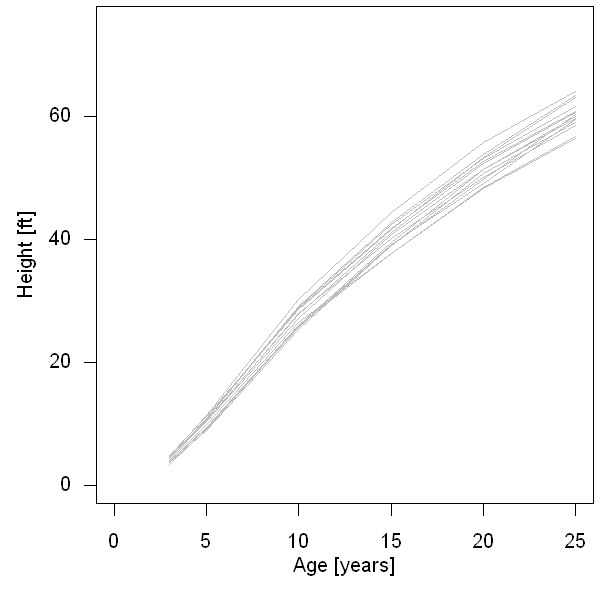

In [111]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(las = 1, ps = 12, mar = c(4, 4, 0.25, 0.25))
plot(0, 0, xlim = c(0, 25), ylim = c(0, 75),
  xlab = NA, ylab = NA, pch = "")
for (i in 1:length(unique(Loblolly$Seed))) {
  lines(height~age,
    data = subset(Loblolly, Seed == unique(Loblolly$Seed)[i]),
    col = 8)
}
par(las = 0)
mtext("Age [years]", side = 1, line = 2)
mtext("Height [ft]", side = 2, line = 2.5)

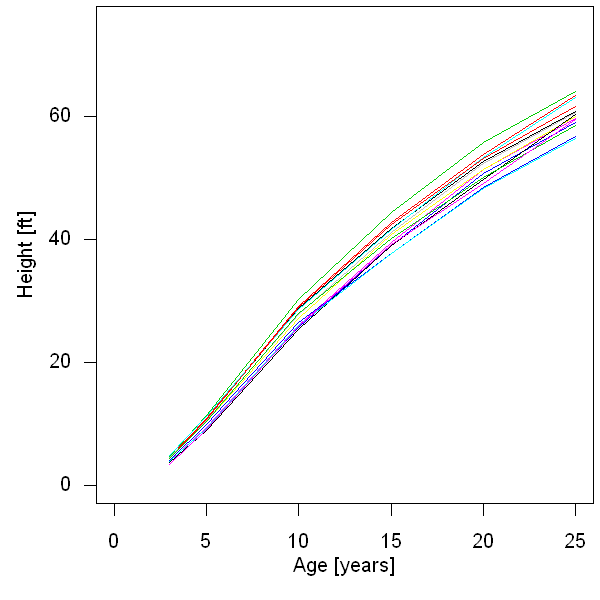

In [112]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(las = 1, ps = 12, mar = c(4, 4, 0.25, 0.25))
plot(0, 0, xlim = c(0, 25), ylim = c(0, 75),
  xlab = NA, ylab = NA, pch = "")
for (i in 1:length(unique(Loblolly$Seed))) {
  lines(height~age,
    data = subset(Loblolly, Seed == unique(Loblolly$Seed)[i]),
    col = i)
}
par(las = 0)
mtext("Age [years]", side = 1, line = 2)
mtext("Height [ft]", side = 2, line = 2.5)

In [113]:
mean_height <- aggregate(Loblolly$height, list(Loblolly$age), mean)
mean_height

Group.1,x
3,4.237857
5,10.205000
10,27.442143
15,40.543571
20,51.468571
25,60.289286


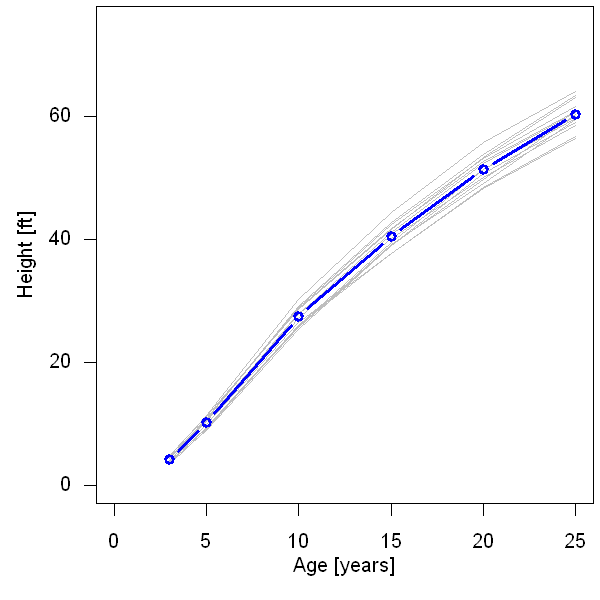

In [114]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(las = 1, ps = 12, mar = c(4, 4, 0.25, 0.25))
plot(0, 0, xlim = c(0, 25), ylim = c(0, 75),
  xlab = NA, ylab = NA, pch = "")
for (i in 1:length(unique(Loblolly$Seed))) {
  lines(height~age,
    data = subset(Loblolly, Seed == unique(Loblolly$Seed)[i]),
    col = 8)
}
lines(mean_height[, 2]~mean_height[, 1], col = 4, type = "b", lwd = 3)
par(las = 0)
mtext("Age [years]", side = 1, line = 2)
mtext("Height [ft]", side = 2, line = 2.5)

In [115]:
Loblolly$height <- Loblolly$height * 0.3048
mean_height_m <- aggregate(Loblolly$height, list(Loblolly$age), mean)
mean_height_m

Group.1,x
3,1.291699
5,3.110484
10,8.364365
15,12.357681
20,15.687621
25,18.376174


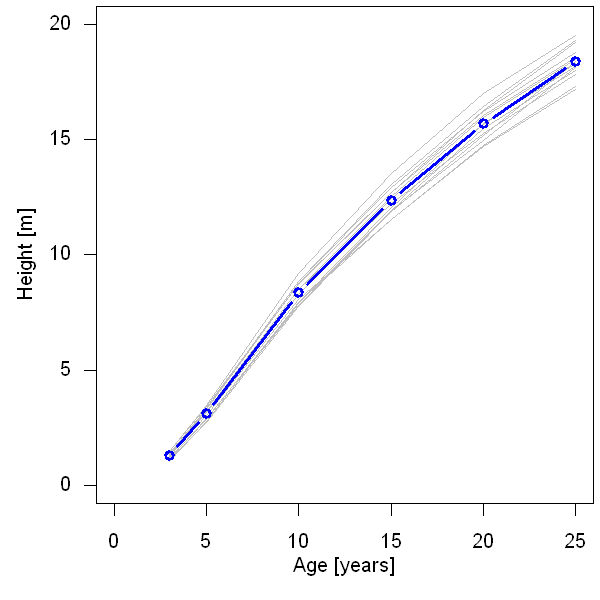

In [116]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(las = 1, ps = 12, mar = c(4, 4, 0.25, 0.25))
plot(0, 0, xlim = c(0, 25), ylim = c(0, 20),
  xlab = NA, ylab = NA, pch = "")
for (i in 1:length(unique(Loblolly$Seed))) {
  lines(height~age,
    data = subset(Loblolly, Seed == unique(Loblolly$Seed)[i]),
    col = 8)
}
lines(mean_height_m[, 2]~mean_height_m[,1], col = 4, type = "b", lwd = 3)
par(las = 0)
mtext("Age [years]", side = 1, line = 2)
mtext("Height [m]", side = 2, line = 2.5)

In [117]:
sd_height_m <- aggregate(Loblolly$height, list(Loblolly$age), sd)
sd_height_m
aggregate(Loblolly$height, list(Loblolly$age), max)

Group.1,x
3,0.1230181
5,0.2485878
10,0.4687478
15,0.5946174
20,0.6741651
25,0.6915406


Group.1,x
3,1.466088
5,3.465576
10,9.208008
15,13.533120
20,17.013936
25,19.537680


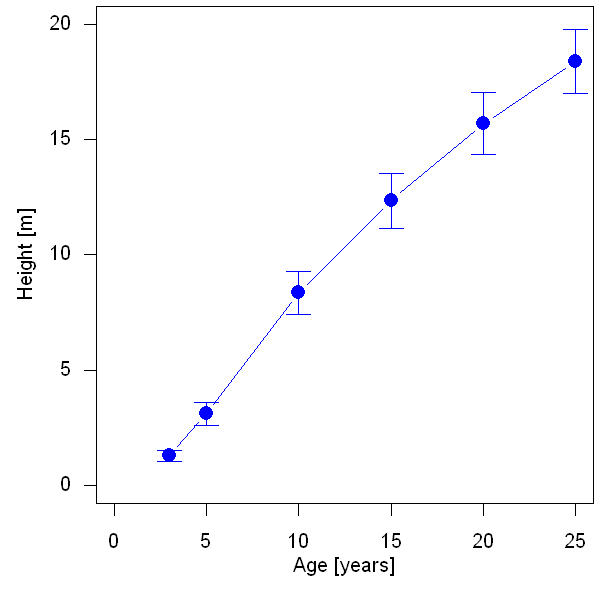

In [118]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(las = 1, ps = 12, mar = c(4, 4, 0.25, 0.25))
plot(0, 0, xlim = c(0, 25), ylim = c(0, 20),
  xlab = NA, ylab = NA, pch = "")
points(mean_height_m[, 2]~mean_height_m[, 1],
    pch = 16, col = 4, cex = 1.5, type = "b")
par(las = 0)
mtext("Age [years]", side = 1, line = 2)
mtext("Height [m]", side = 2, line = 2.5)
arrows(x0 = mean_height_m[, 1], y0 = mean_height_m[, 2],
    x1 = mean_height_m[, 1], y1 = mean_height_m[, 2] + 2 * sd_height_m[, 2],
    col = 4, angle = 90, length = 0.1)
arrows(x0 = mean_height_m[, 1], y0 = mean_height_m[, 2],
    x1 = mean_height_m[, 1], y1 = mean_height_m[, 2] - 2 * sd_height_m[, 2],
    col = 4, angle = 90, length = 0.1)

<p style="font-size: 0.9rem;font-style: italic;"><img style="display: block;" src="https://live.staticflickr.com/3864/14429292919_894304a4b5_w_d.jpg" alt="Iris setosa. Edwards's Botanical Register v.33- t.10 (1847) [S.A. Drake]"><a href="https://www.flickr.com/photos/97123293@N07/14429292919">"Iris setosa. Edwards's Botanical Register v.33- t.10 (1847) [S.A. Drake]"</a><span> by <a href="https://www.flickr.com/photos/97123293@N07">Swallowtail Garden Seeds</a></span> is licensed under <a href="https://creativecommons.org/publicdomain/mark/1.0/?ref=ccsearch&atype=html" style="margin-right: 5px;">CC PDM 1.0</a><a href="https://creativecommons.org/publicdomain/mark/1.0/?ref=ccsearch&atype=html" target="_blank" rel="noopener noreferrer" style="display: inline-block;white-space: none;margin-top: 2px;margin-left: 3px;height: 22px !important;"><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc_icon.svg?image_id=d199bd54-dea3-40bb-97fe-f2677b328013" /><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc-pdm_icon.svg" /></a></p>

In [119]:
data("iris")
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [120]:
setosa <- subset(iris, Species == "setosa")
versicolor <- subset(iris, Species == "versicolor")
virginica <- subset(iris, Species == "virginica")
versicolor

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor
57,6.3,3.3,4.7,1.6,versicolor
58,4.9,2.4,3.3,1.0,versicolor
59,6.6,2.9,4.6,1.3,versicolor
60,5.2,2.7,3.9,1.4,versicolor


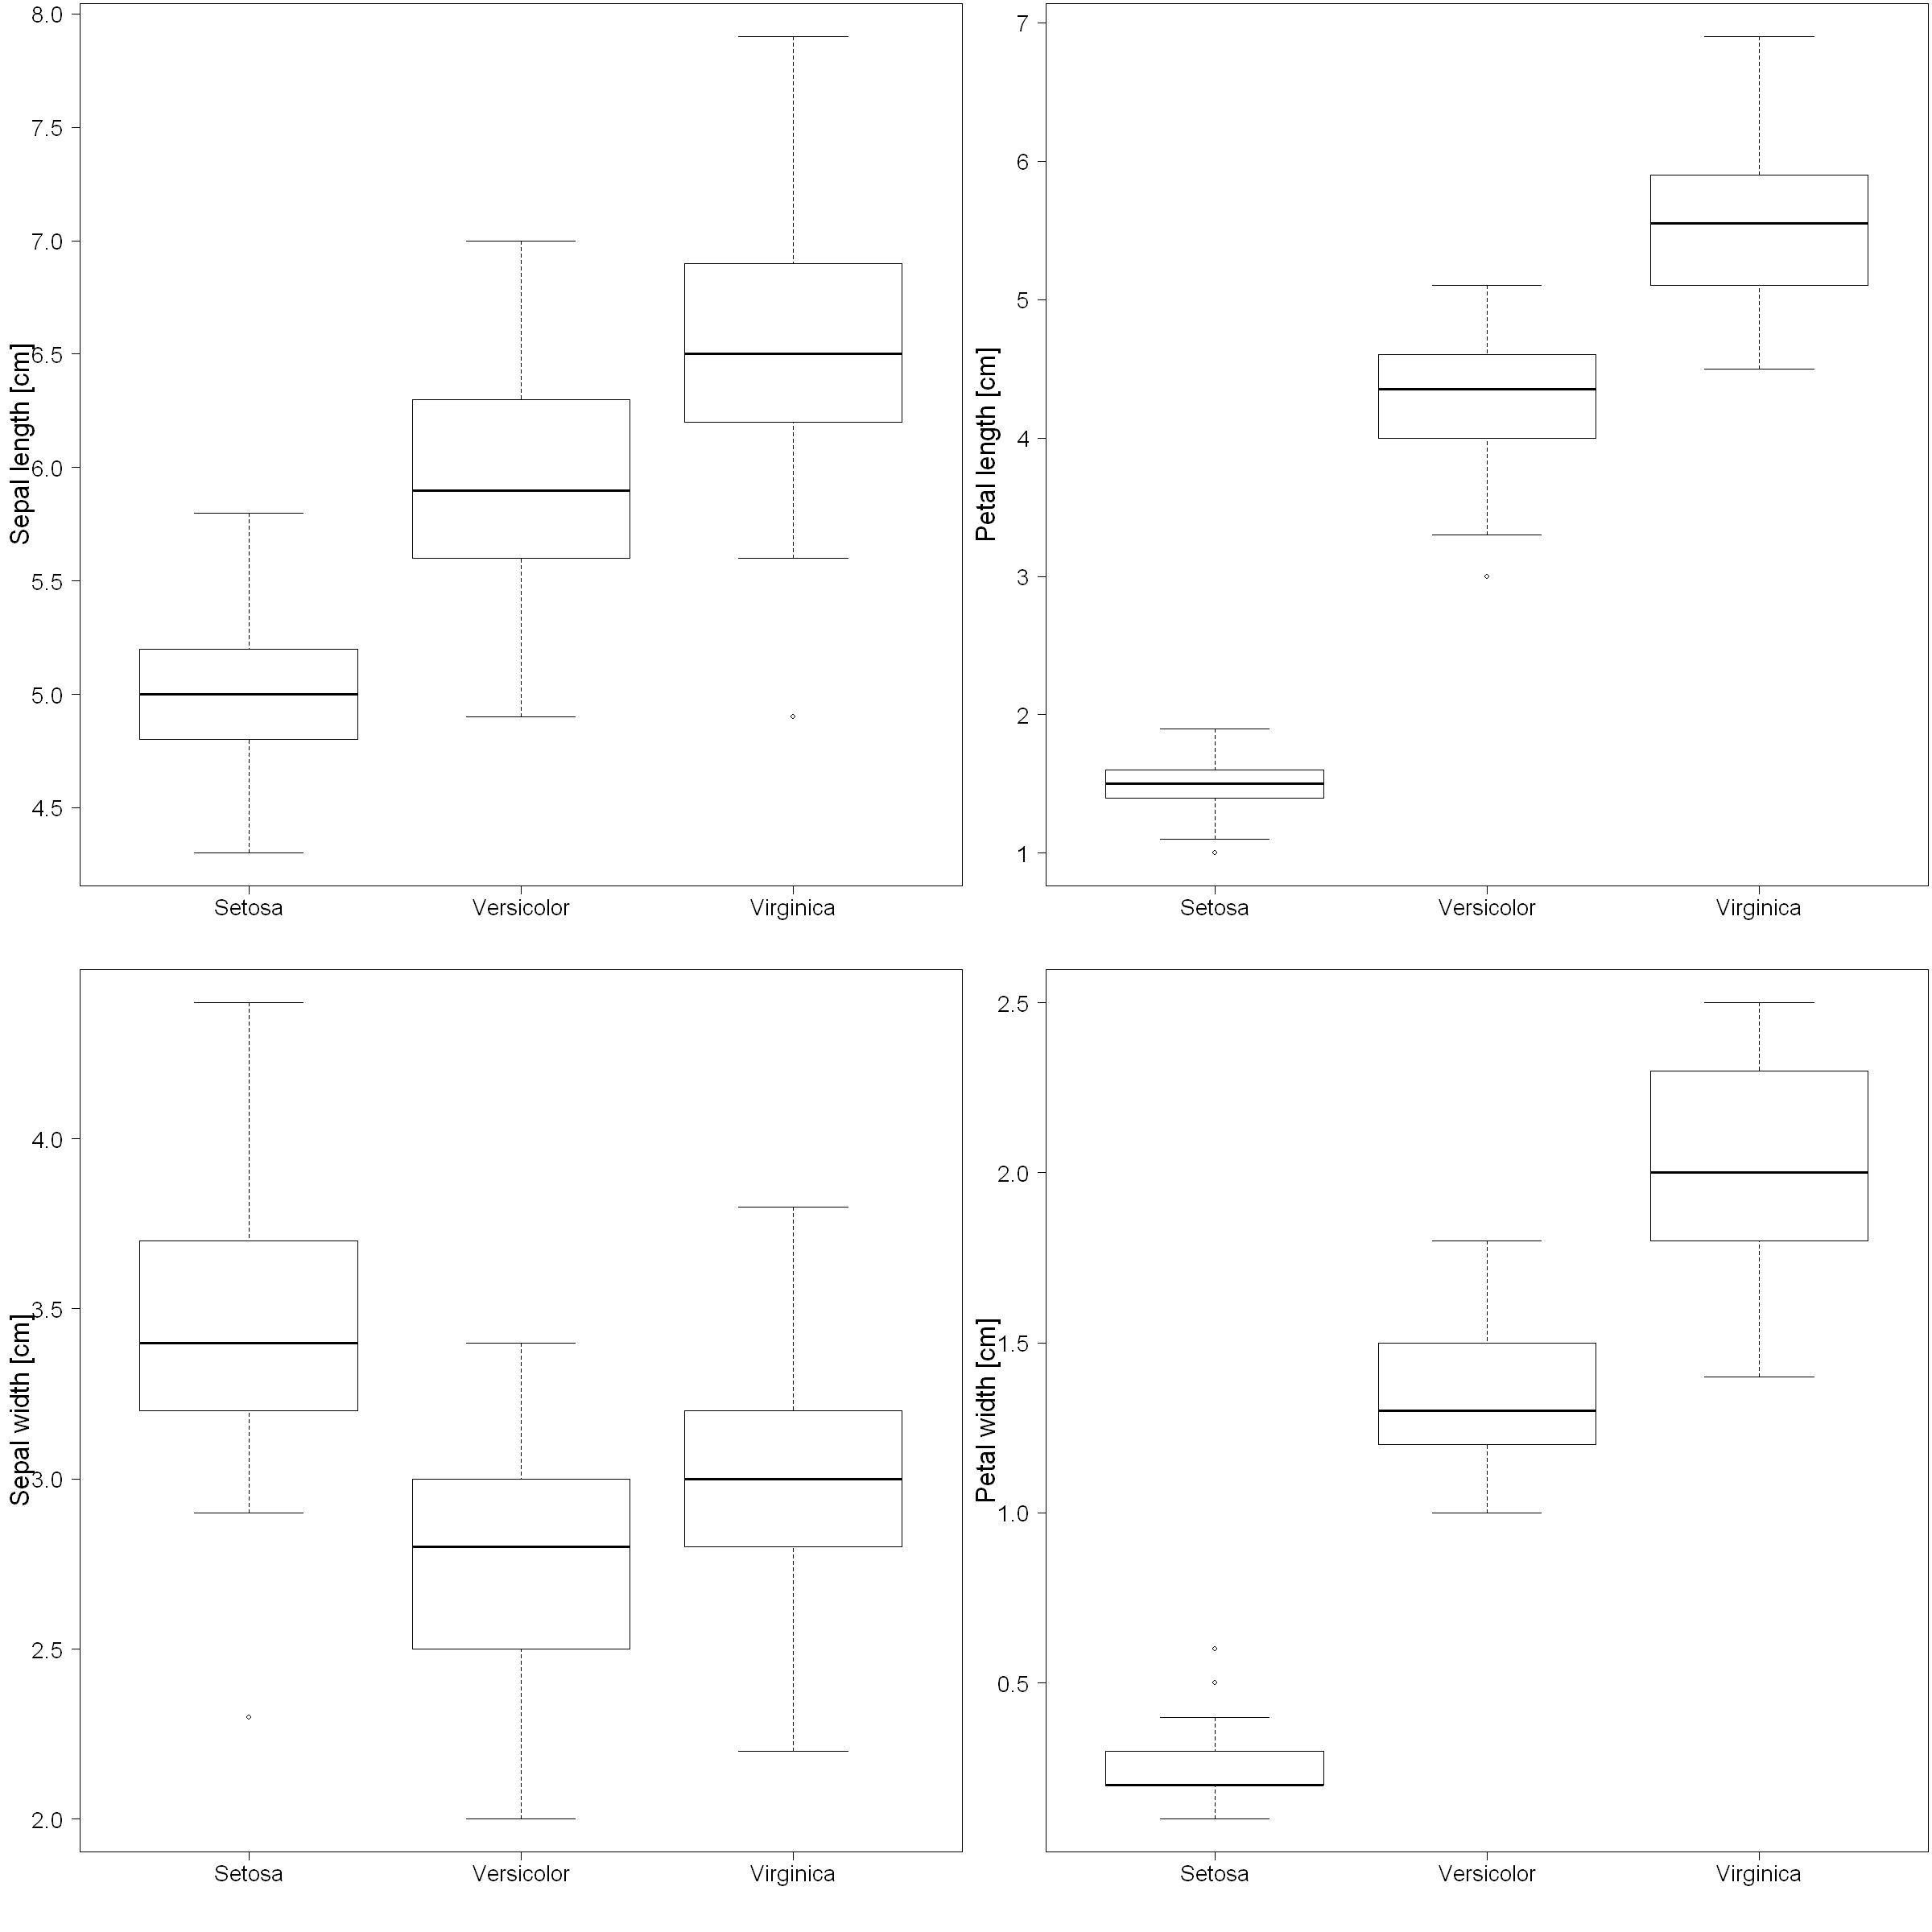

In [121]:
options(repr.plot.width = 20, repr.plot.height = 20)
layout(matrix(c(1, 2, 3, 4), ncol = 2, nrow = 2),
    widths = c(10, 10), heights = c(10, 10))
par(las = 1, ps = 20, pty = "m", mar = c(5, 5, 0.25, 0.25))
boxplot(setosa$Sepal.Length, versicolor$Sepal.Length, virginica$Sepal.Length,
    names = c("Setosa", "Versicolor", "Virginica"))
par(las = 0)
mtext("Sepal length [cm]", side = 2, line = 3)
par(las = 1, ps = 20, pty = "m", mar = c(5, 5, 0.25, 0.25))
boxplot(setosa$Sepal.Width, versicolor$Sepal.Width, virginica$Sepal.Width,
    names = c("Setosa", "Versicolor", "Virginica"))
par(las = 0)
mtext("Sepal width [cm]", side = 2, line = 3)
par(las = 1, ps = 20, pty = "m", mar = c(5, 5, 0.25, 0.25))
boxplot(setosa$Petal.Length, versicolor$Petal.Length, virginica$Petal.Length,
    names = c("Setosa", "Versicolor", "Virginica"))
par(las = 0)
mtext("Petal length [cm]", side = 2, line = 3)
par(las = 1, ps = 20, pty = "m", mar = c(5, 5, 0.25, 0.25))
boxplot(setosa$Petal.Width, versicolor$Petal.Width, virginica$Petal.Width,
    names = c("Setosa", "Versicolor", "Virginica"))
par(las = 0)
mtext("Petal width [cm]", side = 2, line = 3)

In [122]:
t.test(setosa$Sepal.Length, versicolor$Sepal.Length)


	Welch Two Sample t-test

data:  setosa$Sepal.Length and versicolor$Sepal.Length
t = -10.521, df = 86.538, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1057074 -0.7542926
sample estimates:
mean of x mean of y 
    5.006     5.936 


In [123]:
t.test(virginica$Sepal.Width,versicolor$Sepal.Width)


	Welch Two Sample t-test

data:  virginica$Sepal.Width and versicolor$Sepal.Width
t = 3.2058, df = 97.927, p-value = 0.001819
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07771636 0.33028364
sample estimates:
mean of x mean of y 
    2.974     2.770 


## Linear regression

The simplest form of defining a relationship between two parameters is a linear relationship, we can do that by fitting a linear equation in the form of:
<br> $\hat{y}=ax+b$

Our aim is to obtain the fitting parameters *a* and *b* by using <a href="https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm">lm()</a> function.

In [124]:
meteo_data <- read.csv("https://data.ncl.ac.uk/ndownloader/files/24194090")

In [125]:
summary(meteo_data)

         Time     AirTemp_Mean    AirTemp_Max     AirTemp_Min    
 01/06/2019: 1   Min.   : 5.80   Min.   : 8.30   Min.   : 2.400  
 01/07/2019: 1   1st Qu.:11.45   1st Qu.:14.90   1st Qu.: 8.200  
 02/06/2019: 1   Median :13.50   Median :17.20   Median : 9.700  
 02/07/2019: 1   Mean   :13.04   Mean   :16.75   Mean   : 9.664  
 03/05/2019: 1   3rd Qu.:15.10   3rd Qu.:18.90   3rd Qu.:12.050  
 03/06/2019: 1   Max.   :18.70   Max.   :26.00   Max.   :14.600  
 (Other)   :70                                                   
   Humid_Mean      Humid_Max       Humid_Min       WindSpeed    
 Min.   :50.60   Min.   :64.60   Min.   :27.30   Min.   :0.970  
 1st Qu.:61.40   1st Qu.:79.25   1st Qu.:41.25   1st Qu.:1.380  
 Median :68.90   Median :83.90   Median :48.20   Median :1.785  
 Mean   :68.17   Mean   :83.26   Mean   :50.32   Mean   :1.995  
 3rd Qu.:73.03   3rd Qu.:88.35   3rd Qu.:55.67   3rd Qu.:2.542  
 Max.   :89.30   Max.   :91.30   Max.   :84.90   Max.   :4.410  
                 

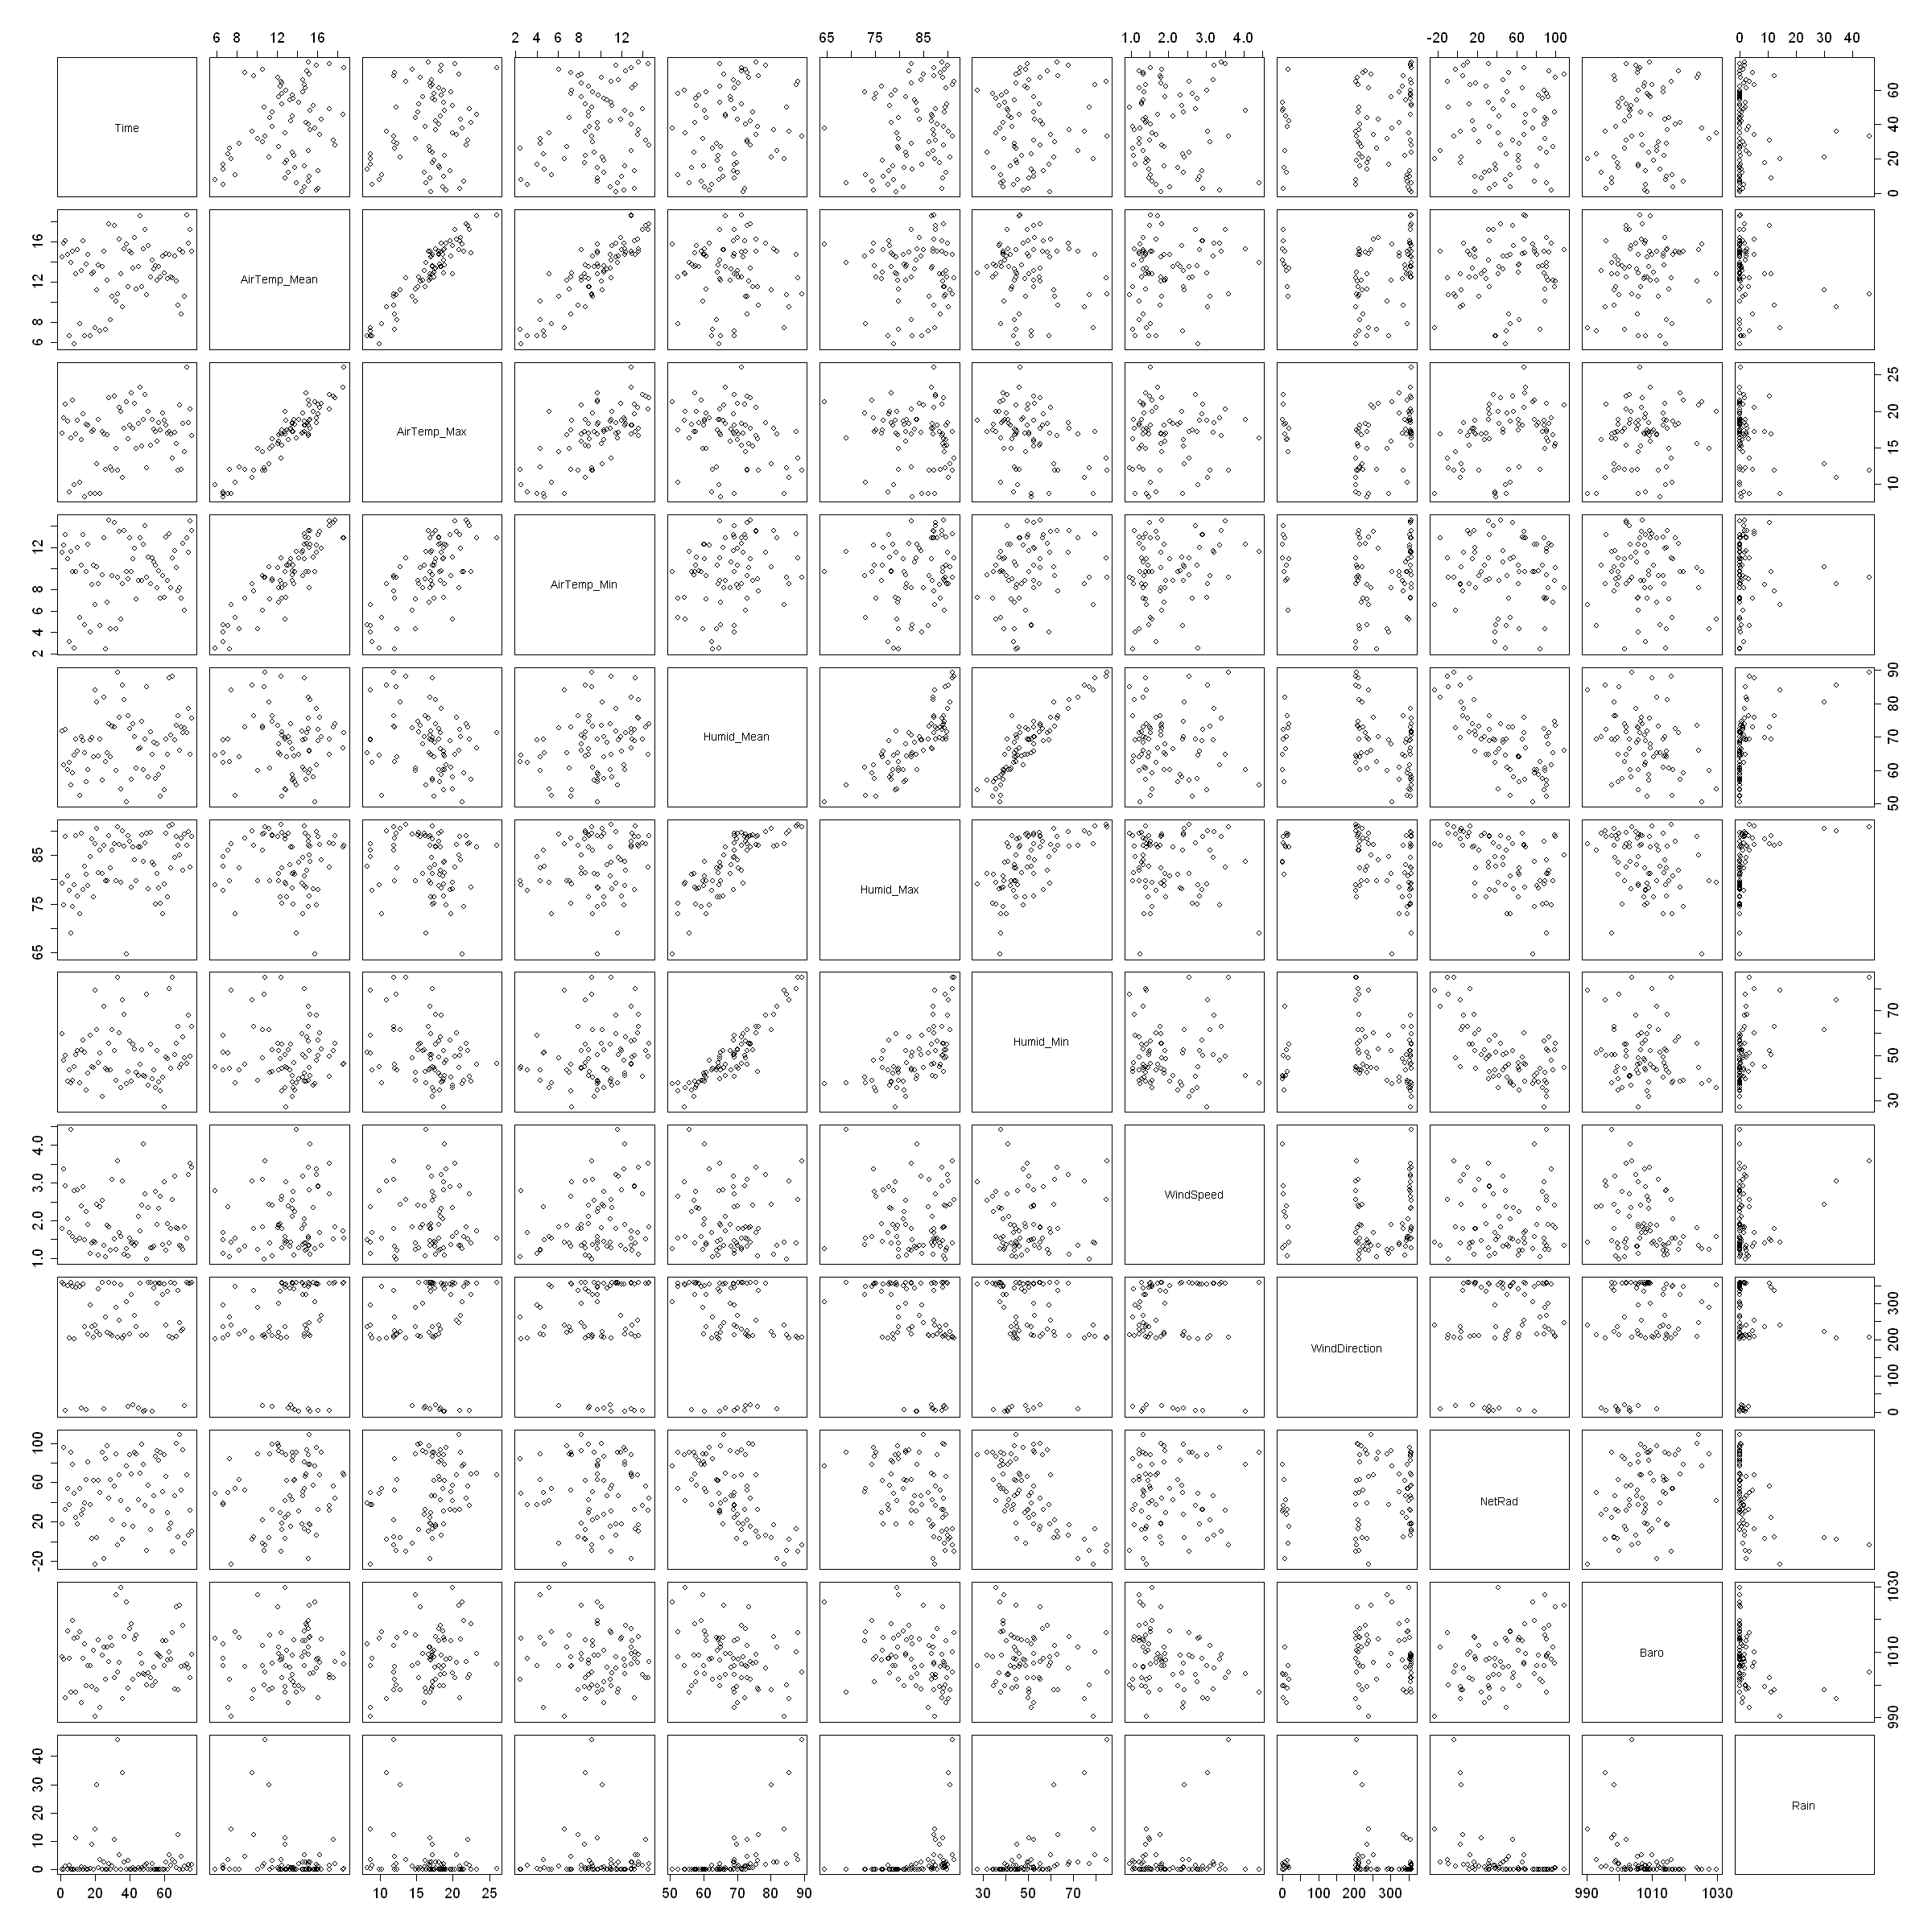

In [126]:
options(repr.plot.width = 20, repr.plot.height = 20)
par(pty = "s", ps = 16)
plot(meteo_data)

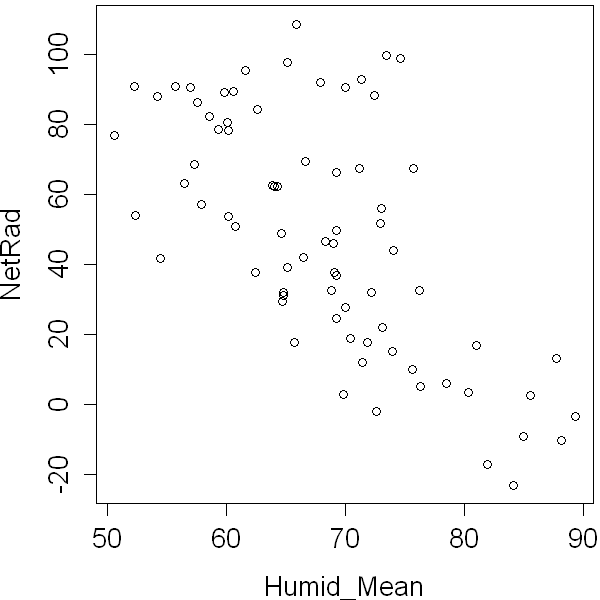

In [127]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(pty = "s", ps = 16, mar = c(4, 4, 0.25, 0.25))
plot(NetRad~Humid_Mean, meteo_data)

In [128]:
lin_reg <- lm(NetRad~Humid_Mean, meteo_data)
summary(lin_reg)


Call:
lm(formula = NetRad ~ Humid_Mean, data = meteo_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.635 -17.062  -2.265  13.362  66.411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 218.2498    22.8575   9.548 1.54e-14 ***
Humid_Mean   -2.4887     0.3325  -7.485 1.21e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.67 on 74 degrees of freedom
Multiple R-squared:  0.4309,	Adjusted R-squared:  0.4232 
F-statistic: 56.03 on 1 and 74 DF,  p-value: 1.213e-10


In [129]:
lin_reg$coefficients
r2_lin_reg <- summary(lin_reg)[8]


(Intercept)  Humid_Mean 
 218.249767   -2.488744

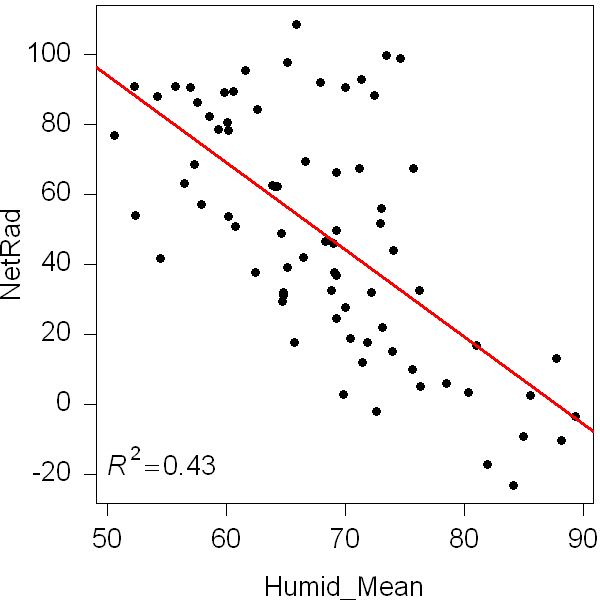

In [130]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(pty = "s", ps = 16, las = 1, mar = c(4, 4, 0.25, 0.25))
plot(NetRad~Humid_Mean, meteo_data, pch = 16)
abline(lin_reg, lwd = 3, col = 2)
text(50, -20, 
    bquote(italic(R)^2 == .(format(r2_lin_reg, digits = 2))),
    adj = c(0, 0))

## Working with time data

<a href="https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/Sys.time">Sys.time()</a> funtion gives us the date and time of the device/server. We see that default format for the date and time is "*year-month-day hh:mm:sec Timezone*"

In [131]:
Sys.time()

[1] "2021-12-17 14:57:30 CET"

In [132]:
class(Sys.time())

[1] "POSIXct" "POSIXt"

POSIXct is the number of seconds since 01.01.1970 in Coordinated Universal Time (UTC). If we remove it from its class, we can see it as a numeric value:

In [133]:
unclass(Sys.time())

[1] 1639749451

In [134]:
head(raw_data[, 1])

[1] "2021-12-17 00:00:00" "2021-12-16 23:59:50" "2021-12-16 23:59:40"
[4] "2021-12-16 23:59:30" "2021-12-16 23:59:20" "2021-12-16 23:59:10"

In [135]:
head(as.POSIXct(raw_data[, 1], tz = "UTC"))

[1] "2021-12-17 00:00:00 UTC" "2021-12-16 23:59:50 UTC"
[3] "2021-12-16 23:59:40 UTC" "2021-12-16 23:59:30 UTC"
[5] "2021-12-16 23:59:20 UTC" "2021-12-16 23:59:10 UTC"

In [136]:
airtemp <- read.csv("https://data.ncl.ac.uk/ndownloader/files/24194087",
    stringsAsFactors = F)
head(airtemp)

Time,AirTemp
03/05/2019 00:15,6.6
03/05/2019 00:30,6.5
03/05/2019 00:45,6.4
03/05/2019 01:00,6.0
03/05/2019 01:15,5.9
03/05/2019 01:30,6.0


In [79]:
date_time <- as.POSIXct(airtemp[, 1], tz = "UTC", format = "%d/%m/%Y %H:%M")
head(date_time)

[1] "2019-05-03 00:15:00 UTC" "2019-05-03 00:30:00 UTC"
[3] "2019-05-03 00:45:00 UTC" "2019-05-03 01:00:00 UTC"
[5] "2019-05-03 01:15:00 UTC" "2019-05-03 01:30:00 UTC"

In [80]:
head(airtemp[, 1])

[1] "03/05/2019 00:15" "03/05/2019 00:30" "03/05/2019 00:45" "03/05/2019 01:00"
[5] "03/05/2019 01:15" "03/05/2019 01:30"

In [81]:
seperated <- strsplit(airtemp[, 1], split = " ")
class(seperated)
head(seperated)

[1] "list"

[[1]]
[1] "03/05/2019" "00:15"     

[[2]]
[1] "03/05/2019" "00:30"     

[[3]]
[1] "03/05/2019" "00:45"     

[[4]]
[1] "03/05/2019" "01:00"     

[[5]]
[1] "03/05/2019" "01:15"     

[[6]]
[1] "03/05/2019" "01:30"

In [82]:
strsplit(airtemp[, 1], split = " ")[[1]][1]

[1] "03/05/2019"

In [84]:
head(lapply(seperated, function(x) {x[1]}))
head(unlist(lapply(seperated, function(x) {x[1]})))

[[1]]
[1] "03/05/2019"

[[2]]
[1] "03/05/2019"

[[3]]
[1] "03/05/2019"

[[4]]
[1] "03/05/2019"

[[5]]
[1] "03/05/2019"

[[6]]
[1] "03/05/2019"

[1] "03/05/2019" "03/05/2019" "03/05/2019" "03/05/2019" "03/05/2019"
[6] "03/05/2019"

In [85]:
date <- unlist(lapply(seperated, function(x) {x[1]}))
time <- unlist(lapply(seperated, function(x) {x[2]}))
head(date)
head(time)

[1] "03/05/2019" "03/05/2019" "03/05/2019" "03/05/2019" "03/05/2019"
[6] "03/05/2019"

[1] "00:15" "00:30" "00:45" "01:00" "01:15" "01:30"

In [86]:
head(strsplit(date, split = "/"))

[[1]]
[1] "03"   "05"   "2019"

[[2]]
[1] "03"   "05"   "2019"

[[3]]
[1] "03"   "05"   "2019"

[[4]]
[1] "03"   "05"   "2019"

[[5]]
[1] "03"   "05"   "2019"

[[6]]
[1] "03"   "05"   "2019"

In [87]:
day <- lapply(strsplit(date, "/"), function(x) {x[1]})
month <- lapply(strsplit(date, "/"), function(x) {x[2]})
year <- lapply(strsplit(date, "/"), function(x) {x[3]})
head(day)
head(month)
head(year)

[[1]]
[1] "03"

[[2]]
[1] "03"

[[3]]
[1] "03"

[[4]]
[1] "03"

[[5]]
[1] "03"

[[6]]
[1] "03"

[[1]]
[1] "05"

[[2]]
[1] "05"

[[3]]
[1] "05"

[[4]]
[1] "05"

[[5]]
[1] "05"

[[6]]
[1] "05"

[[1]]
[1] "2019"

[[2]]
[1] "2019"

[[3]]
[1] "2019"

[[4]]
[1] "2019"

[[5]]
[1] "2019"

[[6]]
[1] "2019"

In [88]:
paste0(year[1], "-", month[1], "-", day[1], " ", time[1])

[1] "2019-05-03 00:15"

In [89]:
date_time_chr <- paste0(year, "-", month, "-", day, " ", time)
head(date_time_chr)

[1] "2019-05-03 00:15" "2019-05-03 00:30" "2019-05-03 00:45" "2019-05-03 01:00"
[5] "2019-05-03 01:15" "2019-05-03 01:30"

In [90]:
date_time_posix <- as.POSIXct(date_time_chr, tz = "UTC")
head(date_time_posix)

[1] "2019-05-03 00:15:00 UTC" "2019-05-03 00:30:00 UTC"
[3] "2019-05-03 00:45:00 UTC" "2019-05-03 01:00:00 UTC"
[5] "2019-05-03 01:15:00 UTC" "2019-05-03 01:30:00 UTC"

In [91]:
date_time_posix[3] - date_time_posix[1]

Time difference of 30 mins

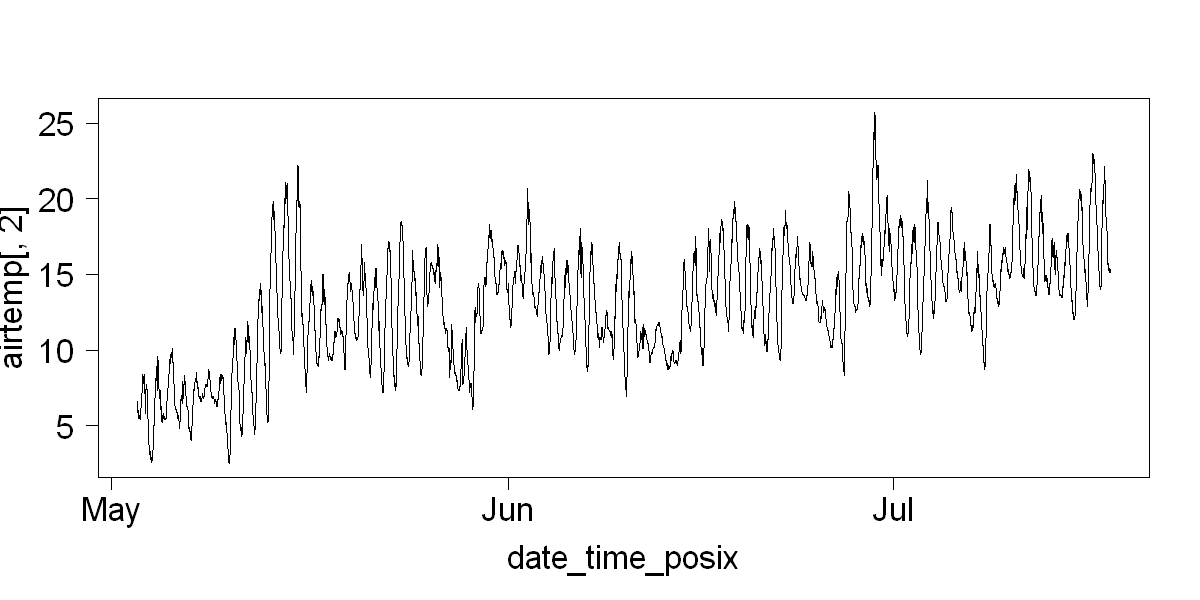

In [92]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(las = 1, ps = 20)
plot(airtemp[, 2]~date_time_posix, type = "l")

## Temporal averages

In [137]:
head(raw_data)

time,value,duration...observation.window
2021-12-17 00:00:00,4.3,-9.997
2021-12-16 23:59:50,4.3,-10.006
2021-12-16 23:59:40,4.3,-9.997
2021-12-16 23:59:30,4.4,-9.992
2021-12-16 23:59:20,4.4,-10.001
2021-12-16 23:59:10,4.4,-10.012


In [138]:
tail(raw_data)

,time,value,duration...observation.window
55914,2021-12-10 00:00:50,5.9,-9.995
55915,2021-12-10 00:00:40,5.9,-10.006
55916,2021-12-10 00:00:30,5.9,-10.000
55917,2021-12-10 00:00:20,5.9,-9.961
55918,2021-12-10 00:00:10,5.9,-10.024
55919,2021-12-10 00:00:00,5.9,-10.004


In [144]:
start <- as.POSIXct(Sys.Date() - 7)
end <- as.POSIXct(Sys.Date())
time_steps_15min <- seq(start, end, 60 * 15)
time_steps_15min

  [1] "2021-12-10 01:00:00 CET" "2021-12-10 01:15:00 CET"
  [3] "2021-12-10 01:30:00 CET" "2021-12-10 01:45:00 CET"
  [5] "2021-12-10 02:00:00 CET" "2021-12-10 02:15:00 CET"
  [7] "2021-12-10 02:30:00 CET" "2021-12-10 02:45:00 CET"
  [9] "2021-12-10 03:00:00 CET" "2021-12-10 03:15:00 CET"
 [11] "2021-12-10 03:30:00 CET" "2021-12-10 03:45:00 CET"
 [13] "2021-12-10 04:00:00 CET" "2021-12-10 04:15:00 CET"
 [15] "2021-12-10 04:30:00 CET" "2021-12-10 04:45:00 CET"
 [17] "2021-12-10 05:00:00 CET" "2021-12-10 05:15:00 CET"
 [19] "2021-12-10 05:30:00 CET" "2021-12-10 05:45:00 CET"
 [21] "2021-12-10 06:00:00 CET" "2021-12-10 06:15:00 CET"
 [23] "2021-12-10 06:30:00 CET" "2021-12-10 06:45:00 CET"
 [25] "2021-12-10 07:00:00 CET" "2021-12-10 07:15:00 CET"
 [27] "2021-12-10 07:30:00 CET" "2021-12-10 07:45:00 CET"
 [29] "2021-12-10 08:00:00 CET" "2021-12-10 08:15:00 CET"
 [31] "2021-12-10 08:30:00 CET" "2021-12-10 08:45:00 CET"
 [33] "2021-12-10 09:00:00 CET" "2021-12-10 09:15:00 CET"
 [35] "2021-12

In [145]:
which_step_15min <- findInterval(as.POSIXct(raw_data[, 1], tz = "UTC"), time_steps_15min)

In [146]:
airtemp_15min <- aggregate(raw_data[, 2],
                           list(time_steps_15min[which_step_15min]),
                           mean, na.rm = T)
head(airtemp_15min)

Group.1,x
2021-12-10 01:00:00,5.900000
2021-12-10 01:15:00,5.920000
2021-12-10 01:30:00,5.943820
2021-12-10 01:45:00,5.918889
2021-12-10 02:00:00,5.900000
2021-12-10 02:15:00,5.765556


In [147]:
time_steps_1h <- seq(start, end, 60 * 60)
which_step_1h <- findInterval(as.POSIXct(raw_data[, 1], tz = "UTC"), time_steps_1h)
airtemp_1h <- aggregate(raw_data[, 2],
                        list(time_steps_1h[which_step_1h]),
                        mean, na.rm = T)
head(airtemp_1h)

Group.1,x
2021-12-10 01:00:00,5.920613
2021-12-10 02:00:00,5.581742
2021-12-10 03:00:00,4.711978
2021-12-10 04:00:00,4.006685
2021-12-10 05:00:00,3.396657
2021-12-10 06:00:00,2.983133


In [148]:
time_steps_6h <- seq(start, end, 60 * 60 * 6)
which_step_6h <- findInterval(as.POSIXct(raw_data[, 1], tz = "UTC"), time_steps_6h)
airtemp_6h <- aggregate(raw_data[, 2],
                        list(time_steps_6h[which_step_6h]),#
                        mean, na.rm = T)
head(airtemp_6h)

Group.1,x
2021-12-10 01:00:00,4.450282
2021-12-10 07:00:00,3.408716
2021-12-10 13:00:00,5.793362
2021-12-11 01:00:00,3.393994
2021-12-11 07:00:00,4.551306
2021-12-11 13:00:00,6.288677


In [149]:
time_steps_24h <- seq(start, end, 60 * 60 * 24)
which_step_24h <- findInterval(as.POSIXct(raw_data[, 1], tz = "UTC"), time_steps_24h)
airtemp_24h <- aggregate(raw_data[, 2],
                         list(time_steps_24h[which_step_24h]),
                         mean, na.rm = T)
airtemp_24h

Group.1,x
2021-12-10 01:00:00,4.185726
2021-12-11 01:00:00,5.955944
2021-12-12 01:00:00,10.011591
2021-12-13 01:00:00,8.071844
2021-12-14 01:00:00,7.487305
2021-12-15 01:00:00,10.159539
2021-12-16 01:00:00,8.400082
2021-12-17 01:00:00,4.300000


Now we can write a function "n.hourly.average", which calculates any temporal average we want.

In [150]:
n.hourly.average <- function(data, n) {
    time_steps <- seq(start, end, 60 * 60 * n)
    which_step <- findInterval(as.POSIXct(data[, 1], tz = "UTC"), time_steps)
    mean_data <- aggregate(data[, 2],
                           list(time_steps[which_step]),
                           mean, na.rm = T)
    return(mean_data)
}

In [151]:
n.hourly.average(raw_data, 12)

Group.1,x
2021-12-10 01:00:00,3.925485
2021-12-10 13:00:00,5.793362
2021-12-11 01:00:00,4.062982
2021-12-11 13:00:00,7.585701
2021-12-12 01:00:00,8.369923
2021-12-12 13:00:00,11.639940
2021-12-13 01:00:00,9.023808
2021-12-13 13:00:00,7.126068
2021-12-14 01:00:00,5.714489
2021-12-14 13:00:00,9.248595


In [152]:
airtemp_30min <- n.hourly.average(raw_data, 0.5)
airtemp_1h <- n.hourly.average(raw_data, 1)
airtemp_3h <- n.hourly.average(raw_data, 3)
airtemp_6h <- n.hourly.average(raw_data, 6)
airtemp_12h <- n.hourly.average(raw_data, 12)
airtemp_24h <- n.hourly.average(raw_data, 24)

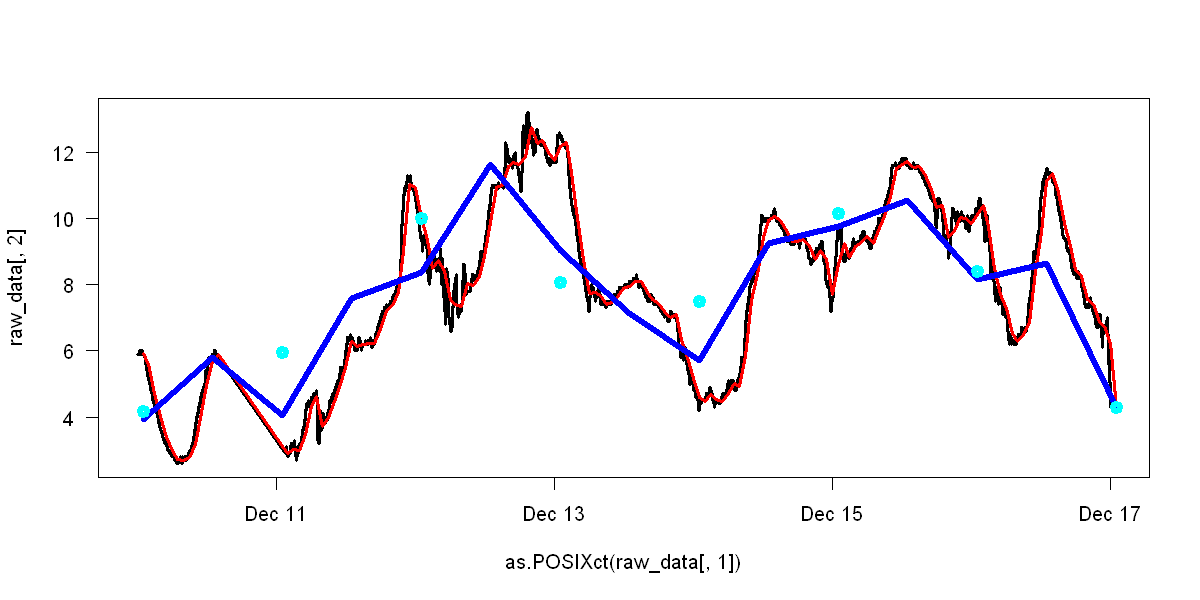

In [161]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(las = 1,ps = 12)
plot(raw_data[, 2]~as.POSIXct(raw_data[, 1]), type = "l", lwd = 3)
lines(airtemp_1h[, 2]~airtemp_1h[, 1], type = "l", lwd = 3, col = 2)
lines(airtemp_12h[, 2]~airtemp_12h[, 1], lwd = 5, col = 4)
points(airtemp_24h[, 2]~airtemp_24h[, 1], lwd = 5, col = 5)

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


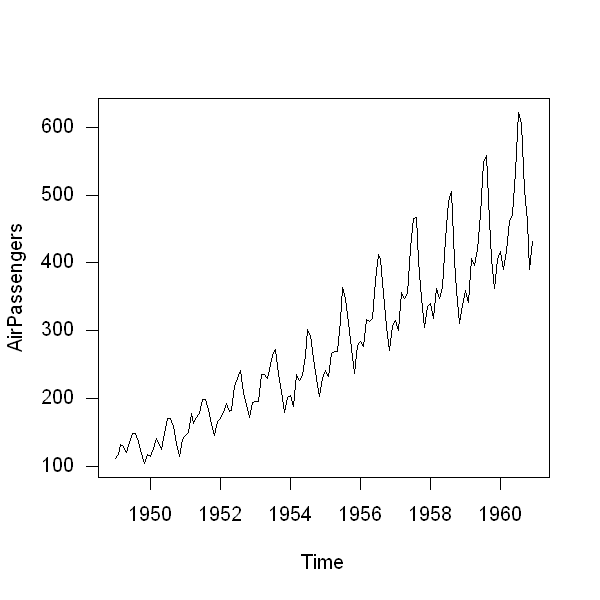

In [45]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(las = 1, ps = 12)
plot(AirPassengers)

**Further links**

- <a href="http://www.r-tutor.com/elementary-statistics">Elementary statistics with R</a> by Chi Yau
- <a href="https://magesblog.com/post/2011-12-01-fitting-distributions-with-r/">Fitting distributions with R</a> by Markus Gesmann
- <a href="https://geocompr.robinlovelace.net/">Geocomputation with R</a> by Robin Lovelace, Jakub Nowosad, Jannes Muenchow
- <a href="https://rspatial.org/raster/index.html">Spatial Data Science with R</a> by Robert J. Hijmans
- <a href="https://www.maths.lancs.ac.uk/~rowlings/Teaching/UseR2012/index.html">Geospatial data in R and beyond</a> by Barry Rowlingson
- <a href="https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/">In-depth introduction to machine learning</a> by Kevin Markham